C:\Users\user\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


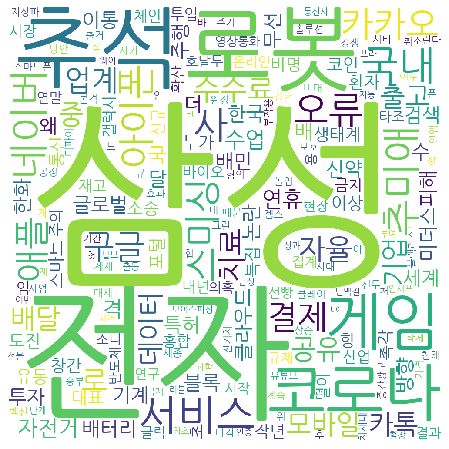

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from konlpy.tag import Twitter
from collections import Counter
import time
import csv
from selenium import webdriver
from openpyxl import Workbook, load_workbook
%matplotlib inline


file = open('C:\\Users\\user\\PycharmProjects\\webcsv1.csv','r',encoding='utf-8')#,encoding='utf-8'
#file = open('C:\\Users\\user\\PycharmProjects\\soc관리과제.txt','r',encoding='utf-8')#,encoding='utf-8'
lists = file.readlines()
file.close()
#print(lists)

twitter = Twitter()
morphs=[]
for sentence in lists:
    morphs.append(twitter.pos(sentence))
#print(morphs)


naa_list=[]
for sentence in morphs:
    for word, tag in sentence:
        if tag in['Noun'] and('기술' not in word) and('개발' not in word) and('시스템' not in word) and('기반' not in word)  and('구축' not in word):
            naa_list.append(word)
#print(naa_list)

count = Counter(naa_list)
words = dict(count.most_common())
tags = count.most_common(100) #단어 n개까지
#print(words)
#print(tags)

#d워드클라우드 만들기
fonts='C:\\Users\\user\\Downloads\\Nanum\\NanumGothic.ttf'
wordcloud = WordCloud(font_path=fonts, background_color='white',width=1000,height=1000)

#cloud = wordcloud.generate(words)
cloud = wordcloud.generate_from_frequencies(words)
#cloud = wordcloud.generate_from_frequencies(dict(tags))

plt.figure(figsize=(10,8))
plt.axis('off')#x,y,축 숫자 제거
plt.imshow(cloud)
plt.show()